# EDA

This file is used for exploratory data analysis with some datasets. When you use datasets from Kaggle, it is better to use kaggle API to download them on CLI. If you are unfamiliar with Kaggle API, please read "how_to_use_kaggle_api.ipynb" beforehand.

There were two waves for this survey. The first wave had been conducted in August-September 2020, whereas the second wave was March-April 2021.

In [10]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. <a href = "https://www.kaggle.com/datasets/melodyyiphoiching/remote-working-survey?select=2020_rws.csv">Remote Working Survey </a>

In [1]:
!kaggle datasets download --unzip -p dataset/ melodyyiphoiching/remote-working-survey


  0%|          | 0.00/373k [00:00<?, ?B/s]
100%|██████████| 373k/373k [00:00<00:00, 771kB/s]
100%|██████████| 373k/373k [00:00<00:00, 766kB/s]


In [11]:
# read the dataset
rws_2020 = pd.read_csv('dataset\\2020_rws.csv',encoding = 'cp1252')
rws_2021 = pd.read_csv('dataset\\2021_rws.csv',encoding = 'cp1252')

There are about 1,500 records in each, but the number of columns are not same. The survey in 2020 had 73 questions whereas, the one in 2021 had 109 questions. Did they include different questionnaires?

In [12]:
print('rws_2020:{} , rws_2021:{}'.format(rws_2020.shape,rws_2021.shape))

rws_2020:(1507, 73) , rws_2021:(1512, 109)


Yes they did. The common columns are few, and most of them are different. Some of columns are written in different words but may be same meaning such as 'Metro / Regional' and 'Metro or Regional'

In [70]:
rws_2020_cols = [c.strip() for c in rws_2020.columns]
rws_2021_cols = [c.strip() for c in rws_2021.columns]

rws_2020 = rws_2020.rename(columns = dict(zip(rws_2020.columns,rws_2020_cols)))
rws_2021 = rws_2021.rename(columns = dict(zip(rws_2021.columns,rws_2021_cols)))
symmetric_diff = len(list(set(rws_2020_cols) ^ set(rws_2021_cols))) # symmetric difference
interaction = len(list(set(rws_2020_cols) & set(rws_2021_cols))) # interaction
print('symmetric difference {} , interaction {}'.format(symmetric_diff,interaction))

symmetric difference 168 , interaction 7


In [43]:
questions_2020 = pd.DataFrame(rws_2020_cols[1:], index = [i for i in range(len(rws_2020_cols[1:]))],columns = ['question'])
questions_2021 = pd.DataFrame(rws_2021_cols[1:], index = [i for i in range(len(rws_2021_cols[1:]))],columns = ['question'])

As there are tons of questions, I tried to classify them into some categories. 

In [522]:
questions = {
    0: {
        'original IDs': ([0], [0]),
        'question': 'What year were you born?',
        'type':'biology',
        'data model': ['PA']
        },
    1: {
        'original IDs': ([1], [1]),
        'question': 'What is your gender?',
        'type':'biology',
        'data model':['PA']
        },
    2: {
        'original IDs': ([2,3], [3]),
        'question': 'industry',
        'type':'biology',
        'data model':['PA','EF']
        },
    # 3: {
    #     'original IDs': ([3],[]),
    #     'question': 'industry (Detailed)',
    #     'type':'biology',
    #     'data model':['PA']
    #     },
    4: {
        'original IDs': ([4,5], [4]),
        'question': 'current occupation?',
        'type':'biology',
        'data model':['PA','EF','TMS','OGP']
        },
    # 5: {
    #     'original IDs': ([5],[]),
    #     'question': 'current occupation? (Detailed)',
    #     'type':'biology'
    #     },
    6: {
        'original IDs': ([6], [5]),
        'question': 'number of employees',
        'type':'biology',
        'data model':['EF']
        },
    7: {
        'original IDs': ([7], [95]),
        'question': 'Do you manage people?',
        'type':'biology',
        'data model':['TMS','OGP']
        },
    8: {
        'original IDs': ([8], [6]),
        'question': 'household',
        'type':'biology',
        'data model':['PA','EF']
        },
    9: {
        'original IDs': ([9], [2]),
        'question': 'length of current job',
        'type':'biology',
        'data model':['PA','EF']
        },
    10: {
        'original IDs': ([10],[7]),
        'question': 'Metro or Regional',
        'type':'biology',
        'data model':['PA']
        },
    11: {
        'original IDs': ([11,19],[10,8]),
        'question': 'how much of your time did you spend remote working?',
        'type':'experience',
        'data model':['RWF']
        },
    12: {
        'original IDs': ([12,20], [24]),
        'question': 'My organisation encouraged people to work remotely',
        'type':'top management support/organization policy',
        'data model':['TMS','OGP']
        },
    13: {
         'original IDs': ([13,21], [25]),
         'question': 'My organisation was well prepared for me to work remotely',
         'type':'top management support/organization policy',
         'data model':['TMS','OGP']
         },
    14: {
        'original IDs': ([14,22], [26]),
        'question': 'It was common for people in my organisation to work remotely',
        'type':'acceptance',
        'data model':['RWF']
        },
    15: {
        'original IDs': ([15,23], [27]),
        'question': 'It was easy to get permission to work remotely',
        'type':'acceptance',
        'data model':['RWF']
        },
    16: {
        'original IDs': ([16,24], [28]),
        'question': 'I could easily collaborate with colleagues when working remotely',
        'type':'team',
        'data model':['INF']
        },
    17: {
        'original IDs': ([17,25],[]),
        'question': 'I would recommend remote working to others',
        'type':'preference',
        'data model':['WP']
        },
    18: {
        'original IDs': ([18,26,27], [9,11,12]),
        'question': 'How much of your time would you have preferred to work remotely?',
        'type':'preference',
        'data model':['WP']
        },
    # 19: {
    #     'original IDs': ([19], [8]),
    #     'question': 'how much of your time did you spend remote working?',
    #     'type':'experience'
    #     },
    20: {
        'original IDs': ([28], [33]),
        'question': 'My employer would encourage more remote working',
        'type':'top management support/organization policy',
        'data model':['TMS']
        },
    21: {
        'original IDs': ([29], [34]),
        'question': 'My employer would make changes to support remote working',
        'type':'top management support/organization policy',
        'data model':['TMS']
        },
    22: {
        'original IDs': ([30], [35]),
        'question': 'I would have more choice about whether I work remotely',
        'type':'acceptance',
        'data model':['RWF']
        },
    23: {
        'original IDs': ([31], [106]),
        'question': 'compare your productivity when you work remotely to when you work at your employer’s workplace',
        'type':'productivity',
        'data model':['EMP']
        },
    24: {
        'original IDs': ([32,36], [36,41]),
        'question': "how many hours would you spend preparing for work and commuting?",
        'type':'experience',
        'data model':[]
        },
    25: {
        'original IDs': ([33,37], [37,42]),
        'question': "how many hours would you spend working?",
        'type':'experience',
        'data model':['EMP']
        },
    26: {
        'original IDs': ([34,38], [39,44]),
        'question': "how many hours would you spend doing personal and family time?",
        'type':'experience',
        'data model':['EMS']
        },
    27: {
        'original IDs': ([35,39], [38,43]),
        'question': "how many hours would you spend caring and domestic responsibilities?",
        'type':'experience',
        'data model':['EMS']
        },
    28: {
        'original IDs': ([], [40]),
        'question': "how many hours would you spend sleeping?",
        'type':'experience',
        'data model':[]
        },
    29: {
        'original IDs': ([40,41], [49,54,52,53,51,48]),
        'question': 'the most/least significant barrier of WFH - Connectivity (internet connection) ; Feeling left out and/or isolated ; Poor management ; IT equipment (computer, printer, etc.) ; Difficulty collaborating remotely ; Caring responsibilities',
        'type': 'flexibility',
        'data model':['INF','EMS','TMS']
        },
    30: {
        'original IDs': ([42,43], [49,54,52,56,59]),
        'question': 'the most/least significant barrier of WFH - Connectivity (internet connection) ; Feeling left out and/or isolated ; Poor management ; Cyber security ; Lack of motivation ; Lack of motivation',
        'type': 'flexibility',
        'data model':['INF','EMS','TMS']
        },
    31: {
        'original IDs': ([44,45], [49,50,54,58]),
        'question': "the most/least significant barrier of WFH - Connectivity (internet connection) ; Feeling left out and/or isolated ; Poor management ; My organisation's software and systems ; My workspace (e.g. suitable chair, lighting, noise levels, facilities) ; I have tasks that can't be done remotely",
        'type': 'flexibility',
        'data model':['INF','EMS','TMS','WPB']
        },
    32: {
       'original IDs': ([46,47,48,49], [49,54,62,61,60,53,51,48,56,59]),
       'question': 'the most/least significant barrier of WFH - Connectivity (internet connection) ; Feeling left out and/or isolated ; Poor management ; Lack of remote working skills ; My living situation (e.g. location, home size, who I live with) ; Management discourages remote working',
       'type': 'flexibility',
       'data model':['INF','EMS','TMS','WPB']
        },
    33: {
        'original IDs': ([50,51,52,53], [50,53,51,48,58,57,53,51,48,62,61,60]),
        'question': 'the most/least significant barrier of WFH - IT equipment (computer, printer, etc.) ; Difficulty collaborating remotely ; Caring responsibilities ; Cyber security ; Lack of motivation ; Lack of motivation',
        'type': 'flexibility',
        'data model':['INF','EMS']
        },  
    34: {
        'original IDs': ([54,55,56,57], [50,56,59,58,57,56,59,62,61,60]),
        'question': "the most/least significant barrier of WFH - IT equipment (computer, printer, etc.) ; Difficulty collaborating remotely ; Caring responsibilities ; My organisation's software and systems ; My workspace (e.g. suitable chair, lighting, noise levels, facilities) ; I have tasks that can't be done remotely",
        'type': 'flexibility',
        'data model':['INF','EMS','WPB']
        },  
    35: {
        'original IDs': ([58,59], [50,58,57,62,61,60]),
        'question': 'the most significant barrier of WFH - IT equipment (computer, printer, etc.) ; Difficulty collaborating remotely ; Caring responsibilities ; Lack of remote working skills ; My living situation (e.g. location, home size, who I live with) ; Management discourages remote working',
        'type': 'flexibility',
        'data model':['INF','EMS','TMS','WPB']
        }, 
    36: {
        'original IDs': ([],[55]),
        'question': 'Have the following barriers to remote working improved or worsened for you over the past 6 months?   - Extra costs',
        'type': 'flexibility',
        'data model':['EF']
        },
    37: {
        'original IDs': ([],[63]),
        'question': 'Have the following barriers to remote working improved or worsened for you over the past 6 months?   - My health and safety when working remotely',
        'type': 'flexibility',
        'data model':[]
        },
    38: {
        'original IDs': ([60,61],[]),
        'question': 'the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; The number of hours  I work ; My work-life balance ; My on-the-job learning opportunities',
        'type':'effect',
        'data model':['EMS','EMP']
        },
    39: {
        'original IDs': ([62,63],[]),
        'question': 'the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing',
        'type':'effect',
        'data model':['EMS','EMP']
        },
    40: {
        'original IDs': ([64,65],[]),
        'question': 'the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; My daily expenses ; My personal relationships ; My job satisfaction',
        'type':'effect',
        'data model':['EMS','EMP']
        },
    41: {
        'original IDs': ([66,67],[]),
        'question': 'the best aspect of remote working for you - The number of hours  I work ; My work-life balance ; My on-the-job learning opportunities ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing',
        'type':'effect',
        'data model':['EMS','EMP']
        },
    42: {
        'original IDs': ([68,69],[]),
        'question': 'the best aspect of remote working for you - The number of hours  I work ; My work-life balance ; My on-the-job learning opportunities ; My daily expenses ; My personal relationships ; My job satisfaction',
        'type':'effect',
        'data model':['EMS','EMP']
        },
    43: {
        'original IDs': ([70,71],[]),
        'question': 'the best aspect of remote working for you - Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing ; My daily expenses ; My personal relationships ; My job satisfaction',
        'type':'effect',
        'data model':['EMS','EMP']
        },
    44: {
        'original IDs': ([],[13]),
        'question': 'Has your employer changed or updated their policy on remote work since COVID-19?',
        'type':'top management support/organization policy',
        'data model':['OGP']
        },
    45: {
        'original IDs': ([],[14]),
        'question': 'have you ever worked part of your day remotely, and part of it at your employer’s workplace?',
        'type':'experience',
        'data model':['RWF']
        },
    46: {
        'original IDs': ([],[15]),
        'question': 'How often do you work this way(worked part of your day remotely, and part of it at your employer’s workplace)?',
        'type':'experience',
        'data model':['WPF']
        },
    47: {
        'original IDs': ([],[16]),
        'question': 'How often would you like to work this way?',
        'type':'preference',
        'data model':['WP']
        },
    48: {
        'original IDs': ([],[17]),
        'question': 'Does your employer have a policy that workers must be at the employer’s workplace some of the time?',
        'type':'top management support/organization policy',
        'data model':['TMS','OGP']
        },
    49: {
        'original IDs': ([],[18]),
        'question': 'How much of your work time does your employer’s policy require you to be at their workplace?',
        'type':'top management support/organization policy',
        'data model':['TMS','OGP']
        },
    50: {
        'original IDs': ([],[19,20,21,22]),
        'question': 'your employer’s policy on remote working',
        'type':'top management support/organization policy',
        'data model':['OGP']
        },
    51: {
        'original IDs': ([],[29,30]),
        'question': 'remote working in the last 6 months',
        'type':'experience',
        'data model':['RWF']
        },
    52: {
        'original IDs': ([],[31]),
        'question': 'Do you think remote working is a positive or a negative for your employer?',
        'type':'acceptance',
        'data model':['EMS','EMP','ORP']
        },
    53: {
        'original IDs': ([],[32]),
        'question': 'Who is most supportive of remote working in your organisation?',
        'type':'top management support/organization policy',
        'data model':['TMS']
        }, 
    54: {
        'original IDs': ([],[46]),
        'question': 'Imagine your employer offered you the option to work remotely whenever you chose, in return for negotiating a pay cut that you both agree on.  Would you be interested in negotiating?',
        'type':'preference',
        'data model':['WP']
        },
    55: {
        'original IDs': ([],[47]),
        'question': 'What is the biggest pay cut you would accept?   Please give your answer as a percentage.',
        'type':'preference',
        'data model':['WP']
        },
    56: {
        'original IDs': ([],[64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91]),
        'question': 'Think about when you worked at your employer’s workplace and some of your colleagues were working remotely. What were the biggest/smallest barriers of working this way?',
        'type':'flexibility',
        'data model':['RWF','WPB','WPF','WTF','INF']
        },
    57: {
        'original IDs': ([],[92]),
        'question':'On days when I work remotely I feel better',
        'type':'effect',
        'data model':['EMS']
        },
    58: {
        'original IDs': ([],[93]),
        'question': 'On days when I work remotely I am more active',
        'type':'effect',
        'data model':['EMS']
        },
    59: {
        'original IDs': ([],[94]),
        'question': 'I feel better on days when I see my colleagues in person',
        'type':'effect',
        'data model':['EMS']
        },
    60: {
        'original IDs': ([],[96]),
        'question': 'Do employees you manage ever work remotely?',
        'type':'acceptance',
        'data model':['RWF']
        },
    61: {
        'original IDs': ([],[97]),
        'question': 'I have discretion to offer or deny remote work to employees I manage',
        'type':'top management support/organization policy',
        'data model':['TMS']
        },
    62: {
        'original IDs': ([],[98]),
        'question': 'Offering remote work helps me retain employees',
        'type':'effect',
        'data model':['EMS']
        },
    63: {
        'original IDs': ([],[99]),
        'question': 'Offering remote work helps me to recruit employees',
        'type':'effect',
        'data model':['ORP']
        },
    64: {
        'original IDs': ([],[100]),
        'question': 'My team works well together when they work remotely',
        'type':'effect',
        'data model':['EMP']
        },
    65: {
        'original IDs': ([],[101]),
        'question': 'I find it easy to manage employees remotely (e.g. tasking and monitoring progress)',
        'type':'effect',
        'data model':['EMP']
        },
    66: {
        'original IDs': ([],[102]),
        'question': 'I find it easy to manage poor performers remotely',
        'type':'effect',
        'data model':['EMP']
        },
    67: {
        'original IDs': ([],[103]),
        'question': 'I feel well-prepared to manage employees remotely',
        'type':'effect',
        'data model':['EMP']
        },
    68: {
        'original IDs': ([],[104]),
        'question': 'Managing people remotely makes me more focused on results',
        'type':'effect',
        'data model':['EMP']
        },
    69: {
        'original IDs': ([],[105]),
        'question': 'I find it easy to contact my employees when they work remotely',
        'type':'effect',
        'data model':['EMP']
        },
    70: {
        'original IDs': ([],[107]),
        'question': 'Roughly how productive are the employees you manage, each hour, when they work remotely?',
        'type':'productivity'
        }
        }

In [258]:
# rws_2020

class Q:

    def __init__(self,questions,questions_2020,questions_2021,df_2020,df_2021):

        self.id = ['Response ID']

        self.questions = questions
        
        self.questions_2020 = questions_2020
        self.questions_2021 = questions_2021

        self.df_2020 = df_2020
        self.df_2021 = df_2021

    def get_q_info(self,search_qid):
        self.q_info = self.questions[search_qid]
        self.qid_2020 = self.q_info['original IDs'][0] # list
        self.qid_2021 = self.q_info['original IDs'][1] # list
        self.q_text = self.q_info['question']
        self.q_type = self.q_info['type']
        print(self.q_info)

        return self.q_info

    def get_questions(self):

        target_questions_2020 = self.questions_2020[self.questions_2020.index.isin(self.qid_2020)]['question'].values.tolist()
        target_questions_2021 = self.questions_2021[self.questions_2021.index.isin(self.qid_2021)]['question'].values.tolist()

        return [target_questions_2020, target_questions_2021]
    
    def get_result(self,target_questions):

        self.result_2020 = self.df_2020.loc[:,self.id + target_questions[0]]
        self.result_2021 = self.df_2021.loc[:,self.id + target_questions[1]]

        return [self.result_2020,self.result_2021]
    
    def get_qid_type(self,q_type):

        qid_list = []

        for qid, q_info in questions.items():
            if q_info['type'] == q_type:
                qid_list.append(qid)

        return qid_list
    
    def unstack_df(self,target_df,new_colnames):
        target_df = target_df.set_index(self.id)
        renamed_df = target_df.rename(columns = dict(zip( target_df.columns, new_colnames)))
        unstacked = renamed_df.unstack()
        new_df = unstacked.reset_index()
        renamed_new_df = new_df.rename(columns = {'level_0':'as_of',0:'original'})
        return renamed_new_df.set_index(self.id)
    
    @staticmethod
    def extract_percentages(responses):
        '''
        Define a function to extract percentages or specific phrases from the list
        '''
        extracted_responses = []
        
        for response in responses:
            if "%" in response:  # Check if the response contains a percentage
                # Extract only the numerical part and the % symbol
                extracted_part = ''.join([char for char in response if char.isdigit() or char == '%'])
                extracted_responses.append(extracted_part)
            else:
                # If no percentage is mentioned, add the whole response
                if 'rarely or never' in response.lower():
                    extracted_responses.append('0%')
                else:
                    extracted_responses.append(response.strip())
        return extracted_responses

    @staticmethod
    def insert_replace_value(df,col,original_text,new_text,new_col):
        df_copied = df.copy()
        new_values = df_copied [col].replace(dict(zip(original_text,new_text))).values
        df_copied .insert(df_copied .shape[1],new_col,new_values)
        return df_copied 

# 1.Experiences

In [286]:
q = Q(questions,questions_2020,questions_2021,rws_2020,rws_2021)
print('The question numbers: {}'.format(q.get_qid_type('experience')))

The question numbers: [11, 24, 25, 26, 27, 28, 45, 46, 51]


## how much of your time did you spend remote working in a year

In [287]:
q_info = q.get_q_info(11)
question_list = q.get_questions()
result_list = q.get_result(question_list)

{'original IDs': ([11, 19], [10, 8]), 'question': 'how much of your time did you spend remote working?', 'type': 'experience'}


In [291]:
experience_q11 = pd.concat([q.unstack_df(result_list[0],['pre-pandemic(2019)','June-August 2020']),q.unstack_df(result_list[1],['October-December 2020','pandemic(2021)'])])

In [292]:
original_text = experience_q11['original'].unique().tolist()
extracted_text =q.extract_percentages(original_text)
experience_q11 = q.insert_replace_value(experience_q11,'original',original_text,extracted_text,'pct')

As you can see, remote work had not been popular pre-pandemic era in NSW. The graph below shows the it was few number of people who had done full remote work in 2019. In contrast, WFH seemed mandatory for those who were able to do so from 2020 to early 2021.

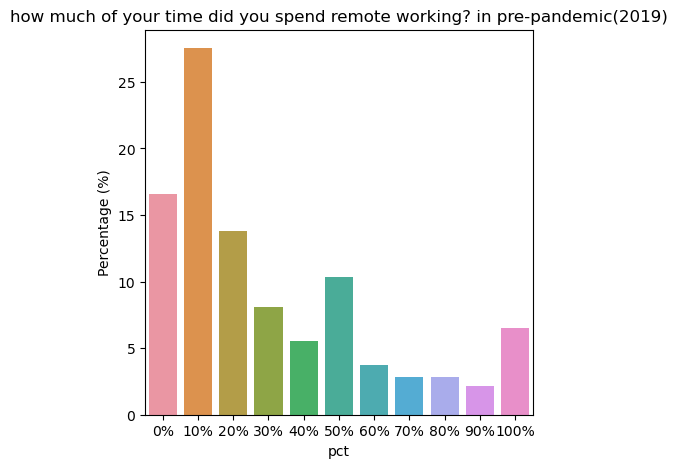

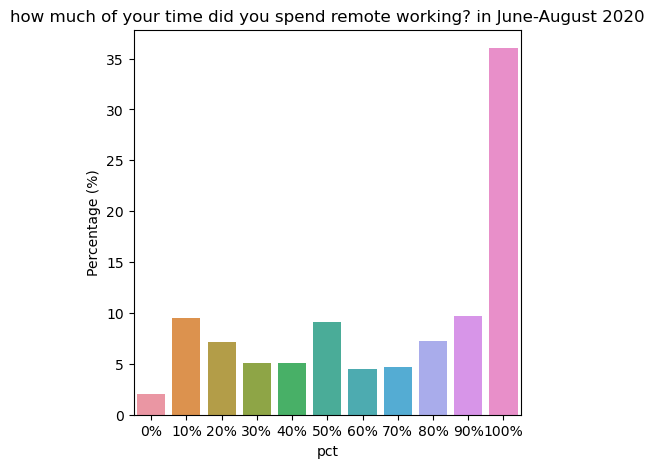

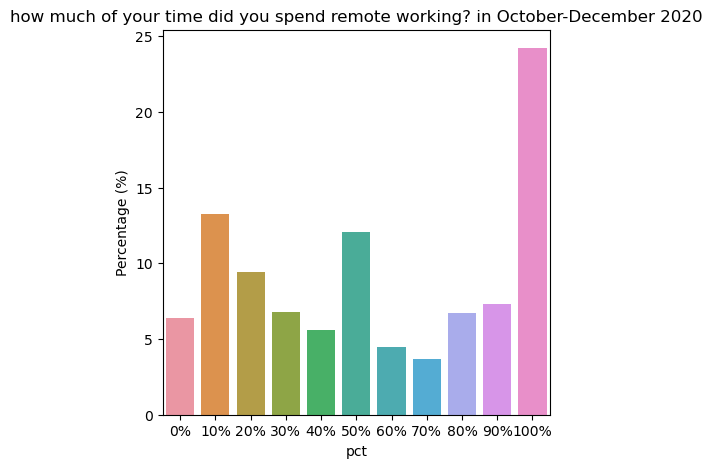

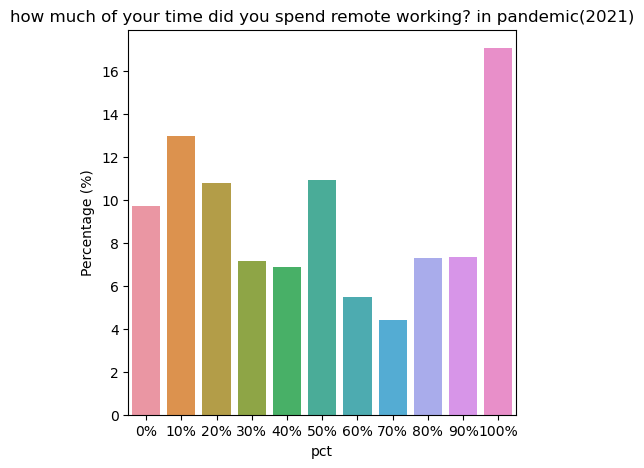

In [296]:
for ao in experience_q11['as_of'].unique():
    category_counts = experience_q11.query('as_of == "{}"'.format(ao))['pct'].value_counts(normalize = True) * 100
    df_percent = category_counts.reset_index()

    plt.figure(figsize = (5,5))
    sns.barplot(x='pct', y='proportion', data=df_percent,order = ['0%','10%','20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%' , '100%'])
    plt.ylabel('Percentage (%)')  
    plt.title('{} in {}'.format(q_info['question'],ao))

## how many hours would you spend preparing for work and commuting?

In [297]:
q_info = q.get_q_info(24)
question_list = q.get_questions()
result_list = q.get_result(question_list)

{'original IDs': ([32, 36], [36, 41]), 'question': 'how many hours would you spend preparing for work and commuting?', 'type': 'experience'}


In [310]:
experience_q24 = pd.concat([q.unstack_df(result_list[0],['at employer"s workplace in 2020','at home in 2020']),q.unstack_df(result_list[1],['at employer"s workplace in 2021','at home in 2021'])])

The boxplot shows it takes more time for work and commuting at employer's workplace than at home, since they needed to commute there. What's interesting is the average of hours in employer's workplace in 2021 became longer compared to the previous year. This could be because those who went to office wanted to complete tasks which could not be done at home, but it was not clearly depicted in this graph.

Text(0.5, 1.0, 'Hours for preparing for work and commuting')

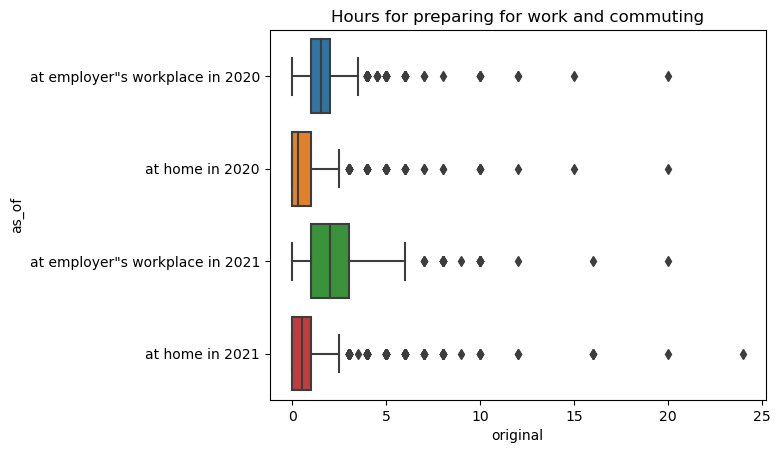

In [311]:
sns.boxplot(experience_q24,y = 'as_of', x = 'original')
plt.title('Hours for preparing for work and commuting')

## how many hours would you spend working?

In [313]:
q_info = q.get_q_info(25)
question_list = q.get_questions()
result_list = q.get_result(question_list)

{'original IDs': ([33, 37], [37, 42]), 'question': 'how many hours would you spend working?', 'type': 'experience'}


In [316]:
experience_q25 = pd.concat([q.unstack_df(result_list[0],['at employer"s workplace in 2020','at home in 2020']),q.unstack_df(result_list[1],['at employer"s workplace in 2021','at home in 2021'])])

There are some outliers but it can be said that the time to prepare for working did not change so much.

Text(0.5, 1.0, 'Hours for preparing for working')

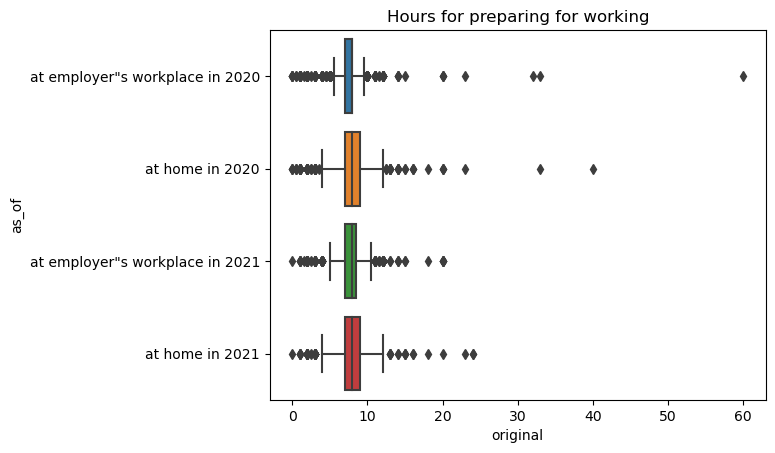

In [317]:
sns.boxplot(experience_q25,y = 'as_of', x = 'original')
plt.title('Hours for preparing for working')

## how many hours would you spend doing personal and family time?

In [322]:
q_info = q.get_q_info(26)
question_list = q.get_questions()
result_list = q.get_result(question_list)

{'original IDs': ([34, 38], [39, 44]), 'question': 'how many hours would you spend doing personal and family time?', 'type': 'experience'}


In [327]:
experience_q26 = pd.concat([q.unstack_df(result_list[0],['at employer"s workplace in 2020','at home in 2020']),q.unstack_df(result_list[1],['at employer"s workplace in 2021','at home in 2021'])])

Text(0.5, 1.0, 'Hours for Personal and family time')

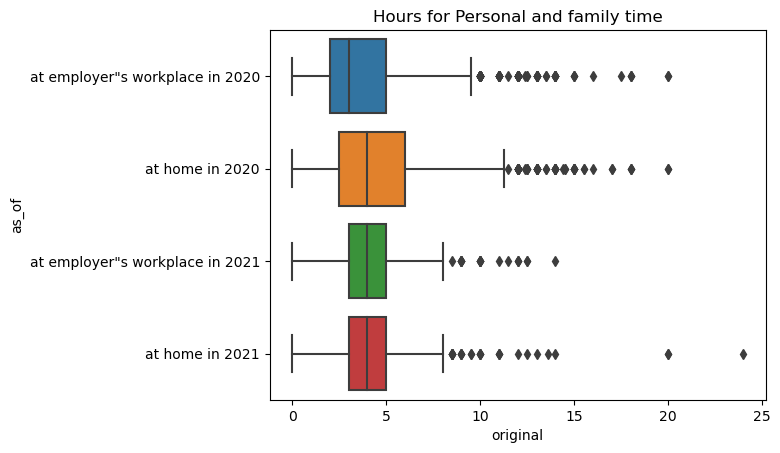

In [328]:
sns.boxplot(experience_q26,y = 'as_of', x = 'original')
plt.title('Hours for Personal and family time')

## how many hours would you spend caring and domestic responsibilities?

In [329]:
q_info = q.get_q_info(27)
question_list = q.get_questions()
result_list = q.get_result(question_list)

{'original IDs': ([35, 39], [38, 43]), 'question': 'how many hours would you spend caring and domestic responsibilities?', 'type': 'experience'}


In [330]:
experience_q27 = pd.concat([q.unstack_df(result_list[0],['at employer"s workplace in 2020','at home in 2020']),q.unstack_df(result_list[1],['at employer"s workplace in 2021','at home in 2021'])])

Text(0.5, 1.0, 'Hours for Caring and domestic responsibilities')

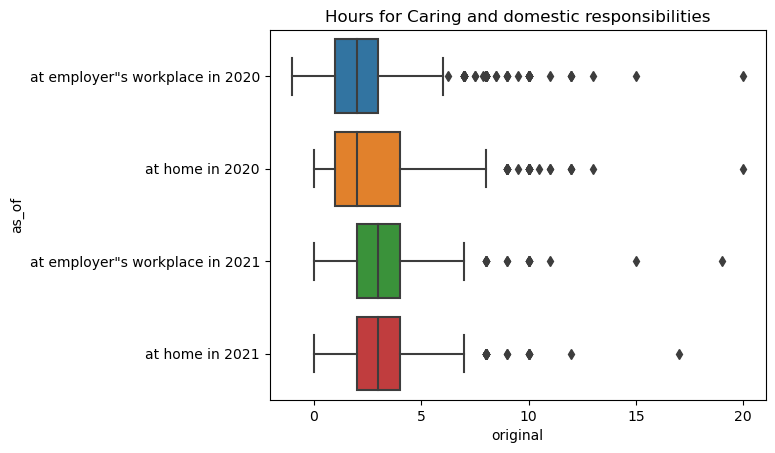

In [333]:
sns.boxplot(experience_q27,y = 'as_of', x = 'original')
plt.title('Hours for Caring and domestic responsibilities')

## have you ever worked part of your day remotely, and part of it at your employer’s workplace?

In [340]:
q_info = q.get_q_info(45)
question_list = q.get_questions()
result_list = q.get_result(question_list)

{'original IDs': ([], [14]), 'question': 'have you ever worked part of your day remotely, and part of it at your employer’s workplace?', 'type': 'experience'}


In [345]:
experience_q45 = pd.concat([q.unstack_df(result_list[0],['']),q.unstack_df(result_list[1],['at employer"s workplace in 2021'])])

Text(0.5, 1.0, 'have you ever worked part of your day remotely, and part of it at your employer’s workplace in 2021?')

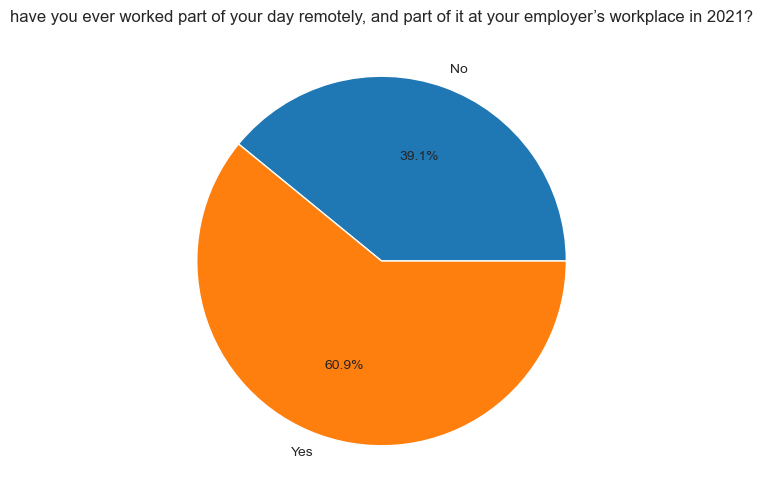

In [374]:
groupby_experience_q45 = experience_q45.groupby('original').count()

data = (groupby_experience_q45/groupby_experience_q45.sum()).values
labels = (groupby_experience_q45/groupby_experience_q45.sum()).index
sns.set_style("whitegrid") # Set style for chart
plt.figure(figsize=(6,6)) # Set figure size
plt.pie(data.reshape([2]), labels=labels, autopct='%1.1f%%') # Create pie chart
plt.title('have you ever worked part of your day remotely, and part of it at your employer’s workplace in 2021?')

# 2. Experience x biology

In [383]:
q = Q(questions,questions_2020,questions_2021,rws_2020,rws_2021)
print('The question numbers: {}'.format(q.get_qid_type('biology')))

The question numbers: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


## "how much of your time did you spend remote working?" x "What year were you born?"

In [428]:
q_info1= q.get_q_info(0)
question_list1 = q.get_questions()
result_list1 = q.get_result(question_list1)

{'original IDs': ([0], [0]), 'question': 'What year were you born?', 'type': 'biology'}


In [429]:
q_info2 = q.get_q_info(11)
question_list2 = q.get_questions()
result_list2 = q.get_result(question_list2)

{'original IDs': ([11, 19], [10, 8]), 'question': 'how much of your time did you spend remote working?', 'type': 'experience'}


In [420]:
bio_2020 = result_list1[0]

exp_2020 = q.unstack_df(result_list2[0],['pre-pandemic(2019)','June-August 2020'])
original_text = exp_2020['original'].unique().tolist()
extracted_text =q.extract_percentages(original_text)
exp_2020 = q.insert_replace_value(exp_2020,'original',original_text,extracted_text,'pct')

result_2020 = pd.merge(bio_2020,exp_2020.reset_index(), on = q.id, how = 'inner')

In [422]:
bio_2021 = result_list1[1]

exp_2021 = q.unstack_df(result_list2[1],['October-December 2020','pandemic(2021)'])
original_text = exp_2021['original'].unique().tolist()
extracted_text =q.extract_percentages(original_text)
exp_2021 = q.insert_replace_value(exp_2021,'original',original_text,extracted_text,'pct')

result_2021 = pd.merge(bio_2021,exp_2021.reset_index(), on = q.id, how = 'inner')

In [426]:
exp11_bio0 = pd.concat([result_2020,result_2021])

In [443]:
# add new columns

pct_int = exp11_bio0['pct'].str.replace('%', '').astype(int)
exp11_bio0.insert(exp11_bio0.shape[1],'pct_int',pct_int)

generation = (exp11_bio0[q_info1['question']] // 10) * 10
exp11_bio0.insert(exp11_bio0.shape[1],'generation',generation)

The following four heatmaps show the results of a survey on remote work in New South Wales (NSW), Australia, during 2020 and 2021. The y-axis represents the decade in which the respondents were born, while the x-axis shows the percentage of remote work implemented, with the values representing the number of corresponding respondents. Each row's values are normalized, so the most frequent response percentage for each generation is drawn with brighter color. Before the pandemic in 2019, it is apparent that the percentage of remote work implementation was very low across all age groups. However, in 2020, when the number of COVID-19 cases rapidly increased, the percentage became predominantly 100% for all age groups, indicating that full-time remote work was the most common. Entering 2021, while the full-time remote percentage remains high, it can be seen that the older the workers' generation, the higher the percentage of non-remote work.

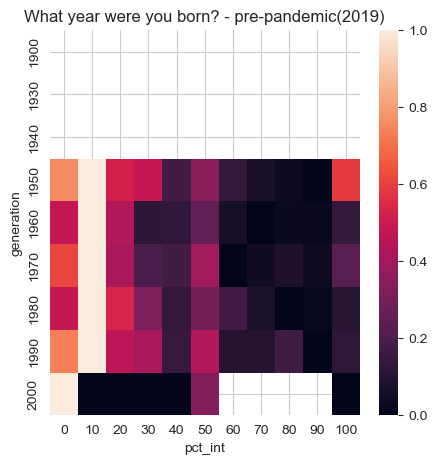

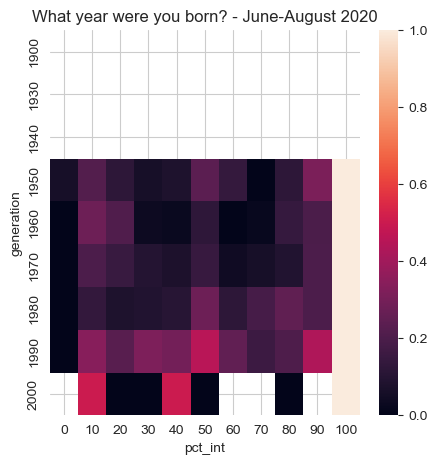

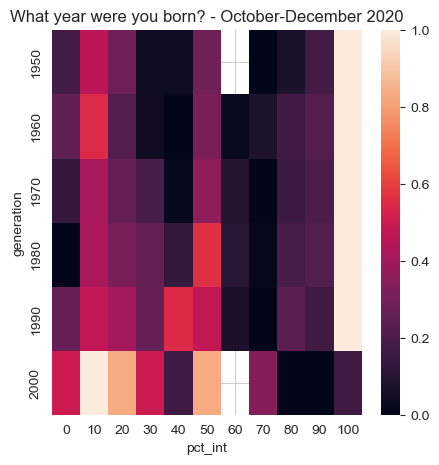

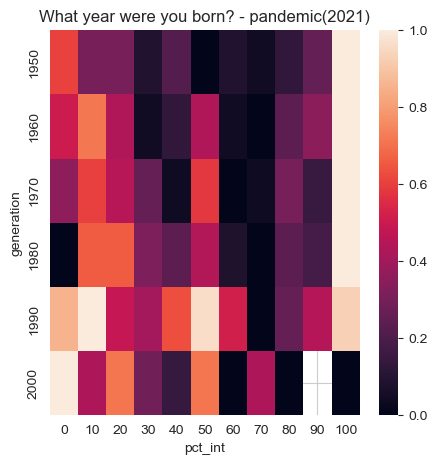

In [457]:
for ao in exp11_bio0['as_of'].unique():
    df = exp11_bio0.query('as_of == "{}"'.format(ao))
    df_ctab = pd.crosstab(df['generation'], df['pct_int'], values = df[q.id], aggfunc = 'count')
    df_normalized = df_ctab.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)
    plt.figure(figsize = (5,5))
    sns.heatmap(df_normalized)
    plt.title('{} - {}'.format(q_info1['question'],ao))

## "how much of your time did you spend remote working?" x "What is your gender?"

In [458]:
q_info1= q.get_q_info(1)
question_list1 = q.get_questions()
result_list1 = q.get_result(question_list1)

{'original IDs': ([1], [1]), 'question': 'What is your gender?', 'type': 'biology'}


In [459]:
q_info2 = q.get_q_info(11)
question_list2 = q.get_questions()
result_list2 = q.get_result(question_list2)

{'original IDs': ([11, 19], [10, 8]), 'question': 'how much of your time did you spend remote working?', 'type': 'experience'}


In [460]:
bio_2020 = result_list1[0]

exp_2020 = q.unstack_df(result_list2[0],['pre-pandemic(2019)','June-August 2020'])
original_text = exp_2020['original'].unique().tolist()
extracted_text =q.extract_percentages(original_text)
exp_2020 = q.insert_replace_value(exp_2020,'original',original_text,extracted_text,'pct')

result_2020 = pd.merge(bio_2020,exp_2020.reset_index(), on = q.id, how = 'inner')

In [461]:
bio_2021 = result_list1[1]

exp_2021 = q.unstack_df(result_list2[1],['October-December 2020','pandemic(2021)'])
original_text = exp_2021['original'].unique().tolist()
extracted_text =q.extract_percentages(original_text)
exp_2021 = q.insert_replace_value(exp_2021,'original',original_text,extracted_text,'pct')

result_2021 = pd.merge(bio_2021,exp_2021.reset_index(), on = q.id, how = 'inner')

In [462]:
exp11_bio1 = pd.concat([result_2020,result_2021])

In [465]:
# add new columns
pct_int = exp11_bio1['pct'].str.replace('%', '').astype(int)
exp11_bio1.insert(exp11_bio1.shape[1],'pct_int',pct_int)

The trend is similar with the graphs above. When it comes to the difference of gender,  for some reasons, females spent less time for WFH in 2021.

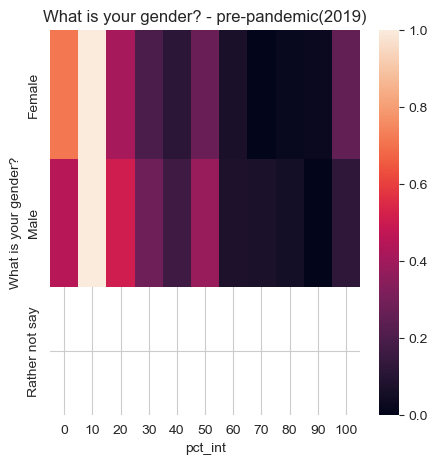

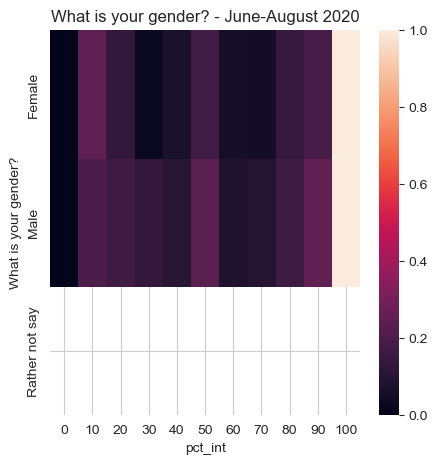

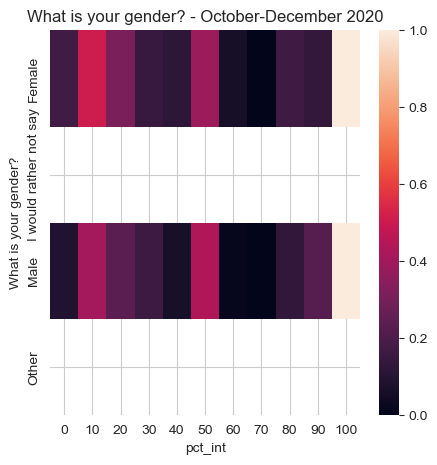

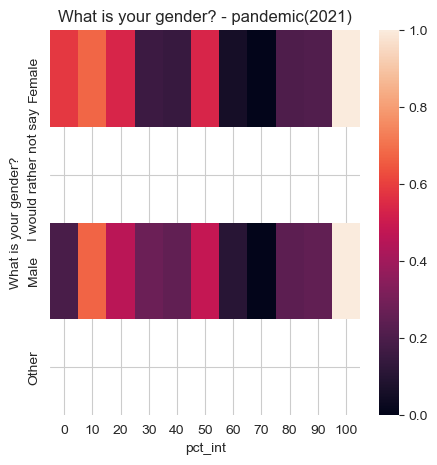

In [466]:
for ao in exp11_bio1['as_of'].unique():
    df = exp11_bio1.query('as_of == "{}"'.format(ao))
    df_ctab = pd.crosstab(df[q_info1['question']], df['pct_int'], values = df[q.id], aggfunc = 'count')
    df_normalized = df_ctab.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)
    plt.figure(figsize = (5,5))
    sns.heatmap(df_normalized)
    plt.title('{} - {}'.format(q_info1['question'],ao))

# how much of your time did you spend remote working? x industry

In [467]:
q_info1= q.get_q_info(2)
question_list1 = q.get_questions()
result_list1 = q.get_result(question_list1)

{'original IDs': ([2], [3]), 'question': 'industry', 'type': 'biology'}


In [468]:
q_info2 = q.get_q_info(11)
question_list2 = q.get_questions()
result_list2 = q.get_result(question_list2)

{'original IDs': ([11, 19], [10, 8]), 'question': 'how much of your time did you spend remote working?', 'type': 'experience'}


In [469]:
bio_2020 = result_list1[0]

exp_2020 = q.unstack_df(result_list2[0],['pre-pandemic(2019)','June-August 2020'])
original_text = exp_2020['original'].unique().tolist()
extracted_text =q.extract_percentages(original_text)
exp_2020 = q.insert_replace_value(exp_2020,'original',original_text,extracted_text,'pct')

result_2020 = pd.merge(bio_2020,exp_2020.reset_index(), on = q.id, how = 'inner')

In [470]:
bio_2021 = result_list1[1]

exp_2021 = q.unstack_df(result_list2[1],['October-December 2020','pandemic(2021)'])
original_text = exp_2021['original'].unique().tolist()
extracted_text =q.extract_percentages(original_text)
exp_2021 = q.insert_replace_value(exp_2021,'original',original_text,extracted_text,'pct')

result_2021 = pd.merge(bio_2021,exp_2021.reset_index(), on = q.id, how = 'inner')

In [471]:
exp11_bio2 = pd.concat([result_2020,result_2021])

In [472]:
# add new columns
pct_int = exp11_bio2['pct'].str.replace('%', '').astype(int)
exp11_bio2.insert(exp11_bio2.shape[1],'pct_int',pct_int)

In industries such as Information Media and Telecommunications, Professional, Scientific and Technical Services, and Financial and Insurance Services, there is a clear trend toward higher remote work percentages, even pre-pandemic. These industries often have tasks that can be performed digitally and may not require a physical presence, making them more conducive to remote work.Industries like Retail Trade, Accommodation and Food Services, and Transport, Postal and Warehousing have lower percentages of remote work. These industries typically require physical presence for tasks like customer service, on-site sales, food preparation, and delivery services, which cannot be easily transitioned to remote settings.The pandemic has markedly increased the percentage of remote work across most industries, with the most noticeable change in those already predisposed to remote work. However, even industries less associated with remote work show an increase in 2020, likely due to lockdown measures and social distancing requirements.
By 2021, while the remote work percentages remain elevated compared to pre-pandemic levels, there is a shift in some industries, possibly indicating a return to on-site work as restrictions eased or as companies adapted to new working conditions. For instance, Public Administration and Safety, and Education and Training, which could include essential services and roles that transitioned back sooner.These variations in remote work implementation can be attributed to the nature of the job tasks, the adaptability of the industry to remote work, the impact of COVID-19 restrictions, and the essential status of the services provided by the industry. The data reflects both the short-term responses to the pandemic and the potential for long-term changes in working patterns across different sectors.

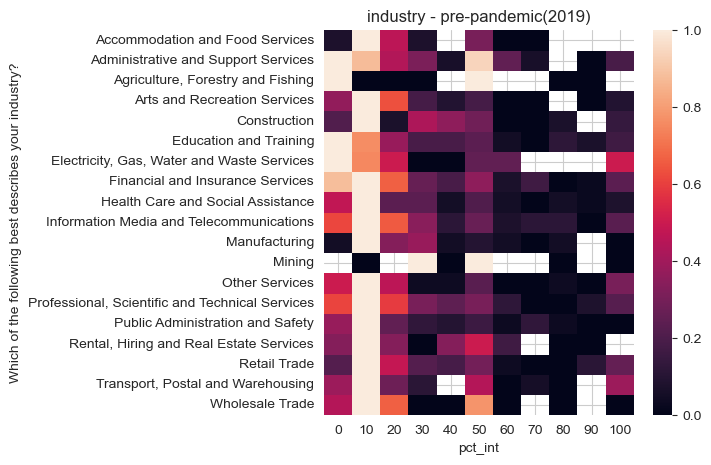

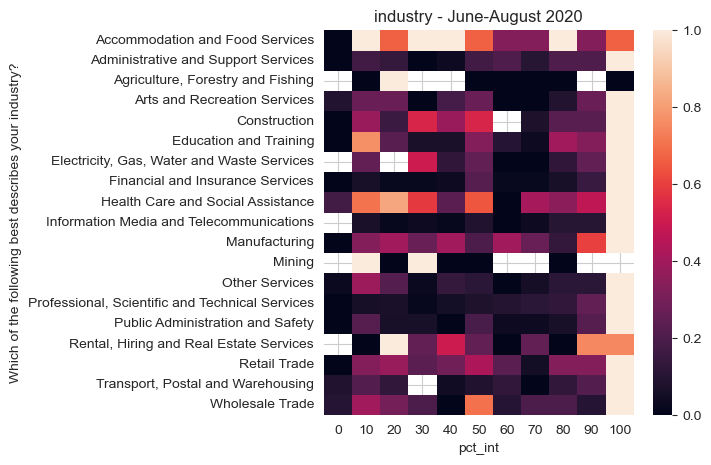

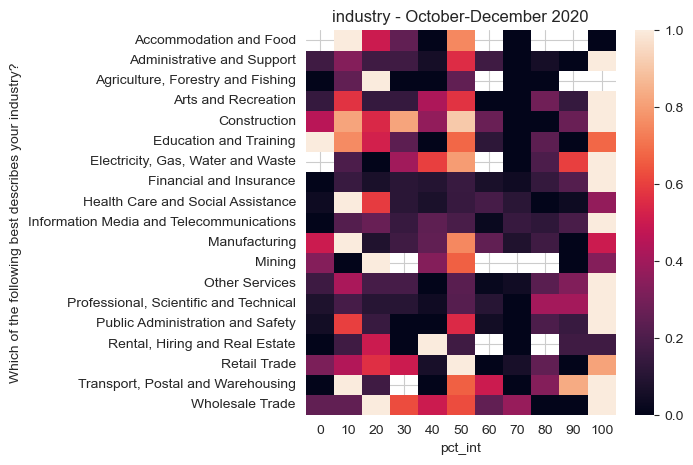

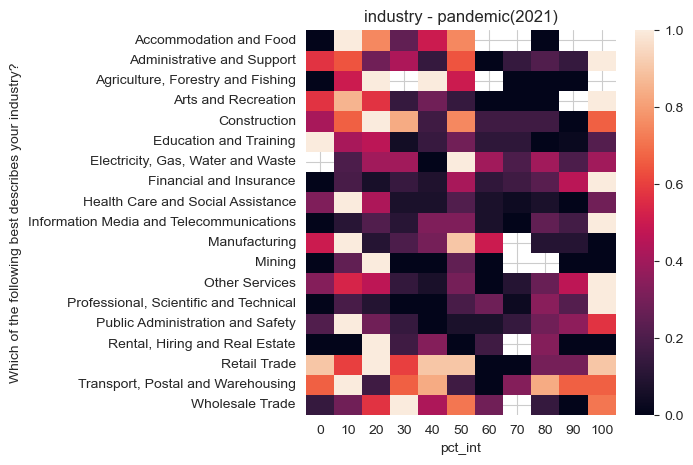

In [476]:
for ao in exp11_bio2['as_of'].unique():
    df = exp11_bio2.query('as_of == "{}"'.format(ao))
    df_ctab = pd.crosstab(df['Which of the following best describes your industry?'], df['pct_int'], values = df[q.id], aggfunc = 'count')
    df_normalized = df_ctab.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)
    plt.figure(figsize = (5,5))
    sns.heatmap(df_normalized)
    plt.title('{} - {}'.format(q_info1['question'],ao))

In [511]:
def experience11_bio(bio_qid):
    q_info1= q.get_q_info(bio_qid)
    question_list1 = q.get_questions()
    result_list1 = q.get_result(question_list1)

    q_info2 = q.get_q_info(11)
    question_list2 = q.get_questions()
    result_list2 = q.get_result(question_list2)

    bio_2020 = result_list1[0]

    exp_2020 = q.unstack_df(result_list2[0],['pre-pandemic(2019)','June-August 2020'])
    original_text = exp_2020['original'].unique().tolist()
    extracted_text =q.extract_percentages(original_text)
    exp_2020 = q.insert_replace_value(exp_2020,'original',original_text,extracted_text,'pct')

    result_2020 = pd.merge(bio_2020,exp_2020.reset_index(), on = q.id, how = 'inner')
    result_2020 = result_2020.rename(columns = dict(zip(np.array(question_list1).reshape(2),[q_info1['question'] for i in range(len(np.array(question_list1).reshape(2)))])))

    bio_2021 = result_list1[1]

    exp_2021 = q.unstack_df(result_list2[1],['October-December 2020','pandemic(2021)'])
    original_text = exp_2021['original'].unique().tolist()
    extracted_text =q.extract_percentages(original_text)
    exp_2021 = q.insert_replace_value(exp_2021,'original',original_text,extracted_text,'pct')

    result_2021 = pd.merge(bio_2021,exp_2021.reset_index(), on = q.id, how = 'inner')
    result_2021 = result_2021.rename(columns = dict(zip(np.array(question_list1).reshape(2),[q_info1['question'] for i in range(len(np.array(question_list1).reshape(2)))])))

    exp_bio = pd.concat([result_2020,result_2021])

    # add new columns
    pct_int = exp_bio['pct'].str.replace('%', '').astype(int)
    exp_bio.insert(exp_bio.shape[1],'pct_int',pct_int)

    return exp_bio

exp11_bio4 = experience11_bio(4)

{'original IDs': ([4], [4]), 'question': 'current occupation?', 'type': 'biology'}
{'original IDs': ([11, 19], [10, 8]), 'question': 'how much of your time did you spend remote working?', 'type': 'experience'}


Clerical and Administrative and Professional occupations exhibit higher percentages of remote work. This likely reflects the nature of these jobs, which often involve tasks that can be performed digitally, such as computer-based work, which is more amenable to remote settings.

Labourers, Machinery Operators and Drivers, and Technicians and Trades workers show lower remote work percentages. These roles typically require physical presence, handling of equipment, or on-site activities, which are less compatible with remote work.

During the peak of the pandemic in 2020, there is an overall increase in remote work across most occupations, with significant variation between them. This is a direct response to lockdowns and social distancing measures, forcing many to adopt remote work where possible.

By 2021, while the remote work percentages for most occupations remain higher than pre-pandemic levels, there is a noticeable shift in certain occupations. Some jobs may have returned to on-site work as restrictions were relaxed, or where remote work was less sustainable or efficient in the long term.

The differences in remote work percentages across occupations reflect the adaptability of the job tasks to remote work, the necessity for physical presence, and the impact of the pandemic on workplace practices. Occupations that could maintain productivity remotely have likely continued to do so, whereas others that require in-person interaction or handling of physical goods have seen a return to on-site work as the situation has allowed.

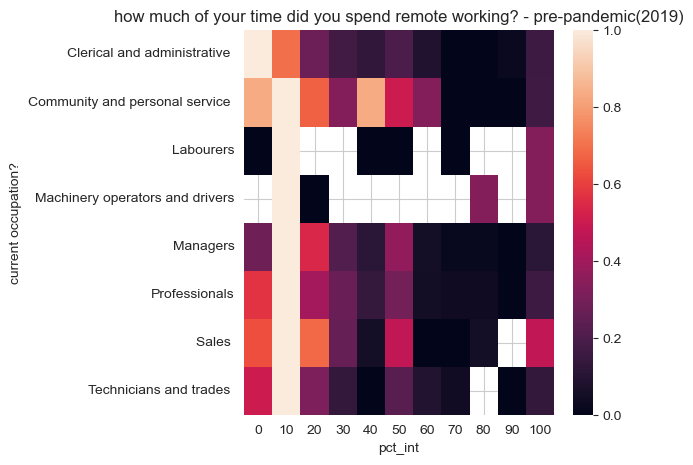

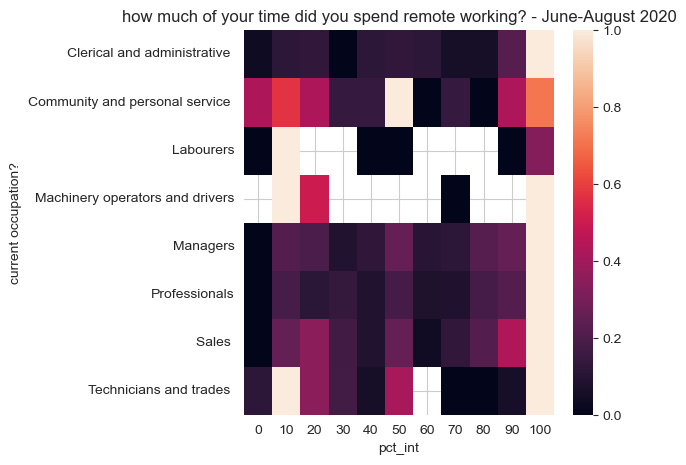

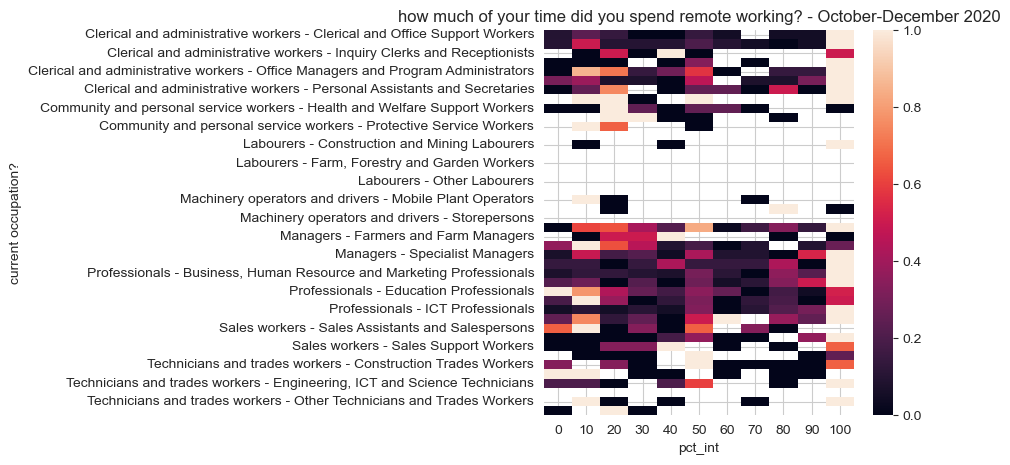

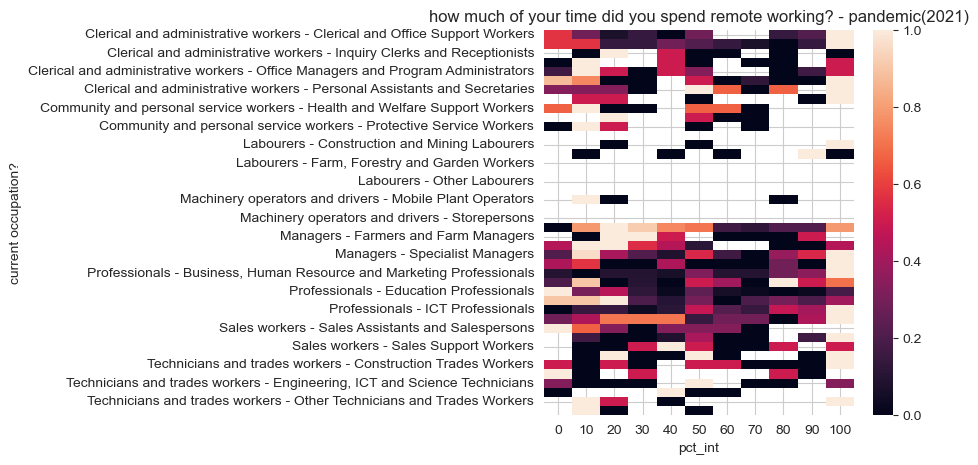

In [512]:
def viz_exp11_bio(rawdata):
    for ao in rawdata['as_of'].unique():
        df = rawdata.query('as_of == "{}"'.format(ao))
        df_ctab = pd.crosstab(df[df.columns[1]], df['pct_int'], values = df[q.id], aggfunc = 'count')
        df_normalized = df_ctab.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)
        plt.figure(figsize = (5,5))
        sns.heatmap(df_normalized)
        plt.title('{} - {}'.format(q_info2['question'],ao))

viz_exp11_bio(exp11_bio4)

{'original IDs': ([6], [5]), 'question': 'number of employees', 'type': 'biology'}
{'original IDs': ([11, 19], [10, 8]), 'question': 'how much of your time did you spend remote working?', 'type': 'experience'}


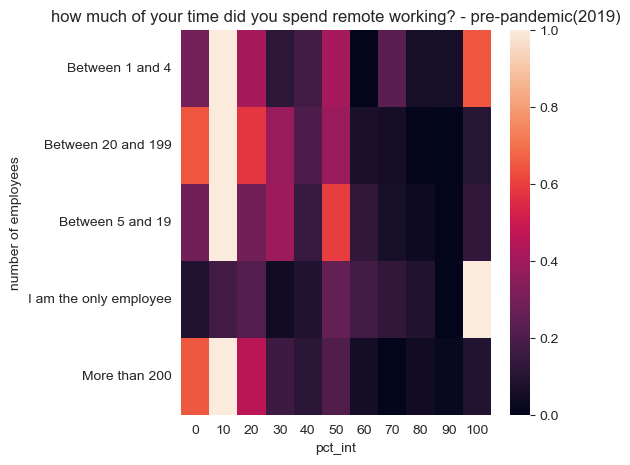

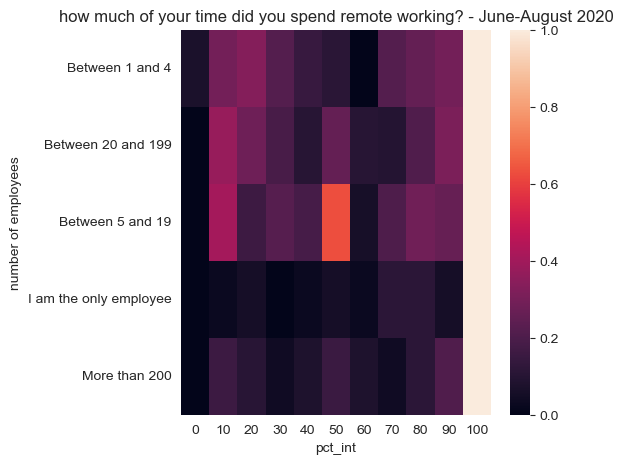

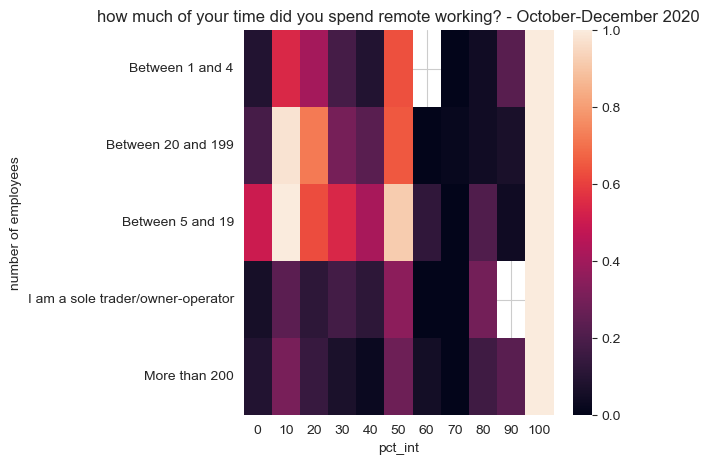

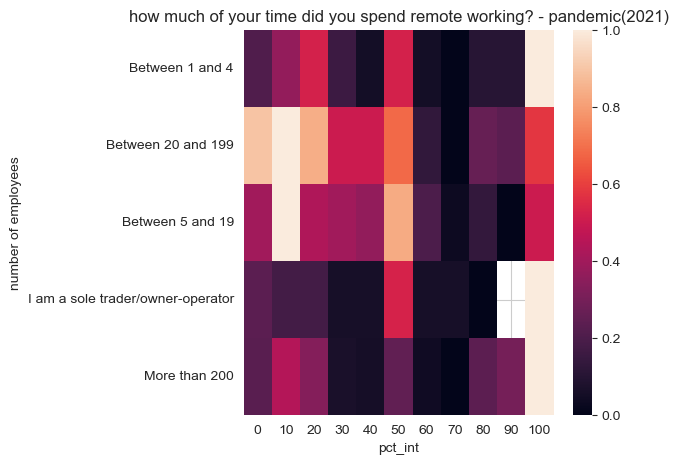

In [513]:
viz_exp11_bio(experience11_bio(6))

{'original IDs': ([7], [95]), 'question': 'Do you manage people?', 'type': 'biology'}
{'original IDs': ([11, 19], [10, 8]), 'question': 'how much of your time did you spend remote working?', 'type': 'experience'}


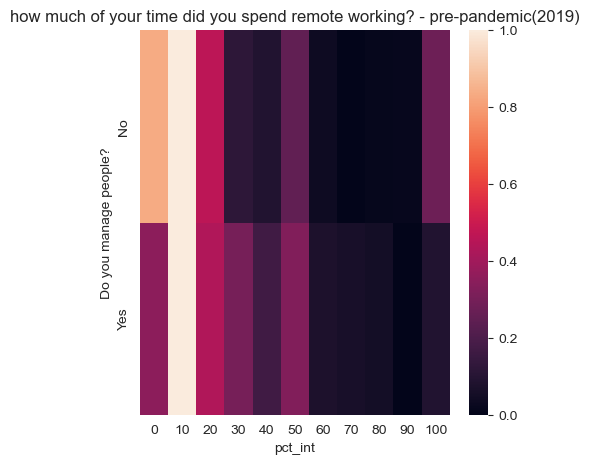

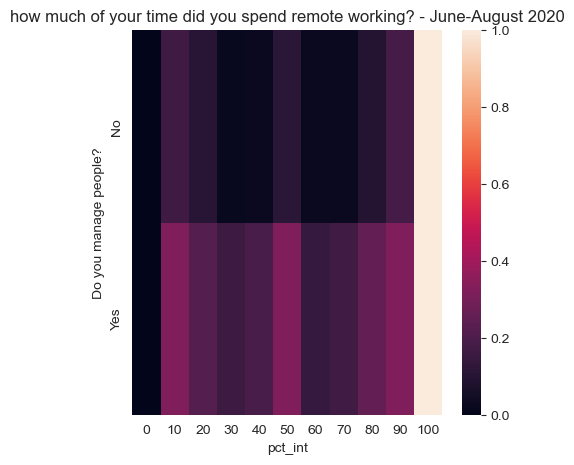

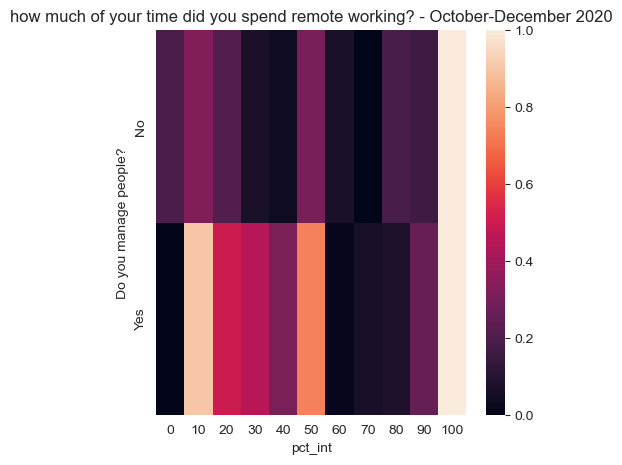

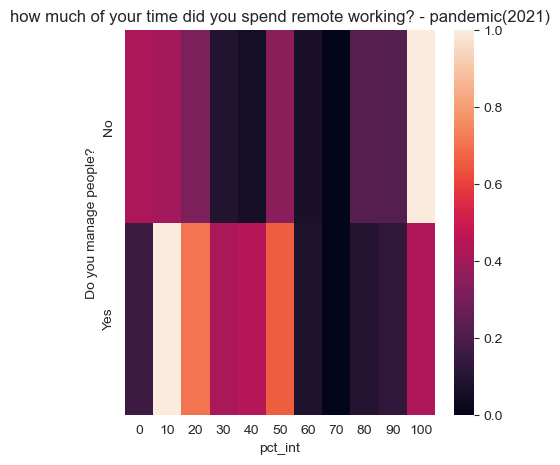

In [515]:
viz_exp11_bio(experience11_bio(7))

{'original IDs': ([8], [6]), 'question': 'household', 'type': 'biology'}
{'original IDs': ([11, 19], [10, 8]), 'question': 'how much of your time did you spend remote working?', 'type': 'experience'}


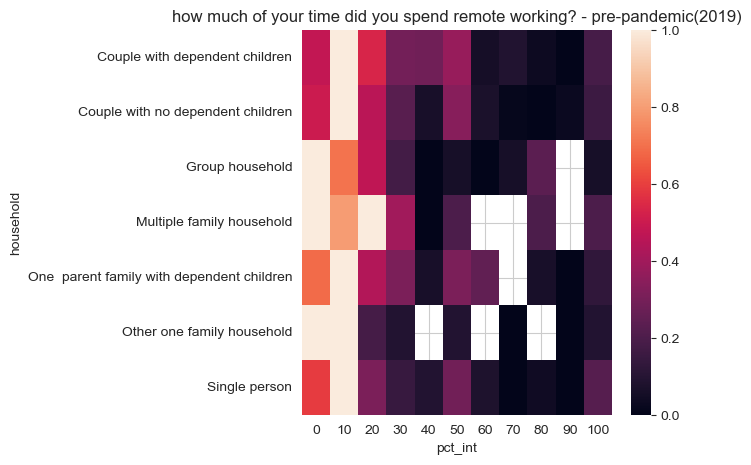

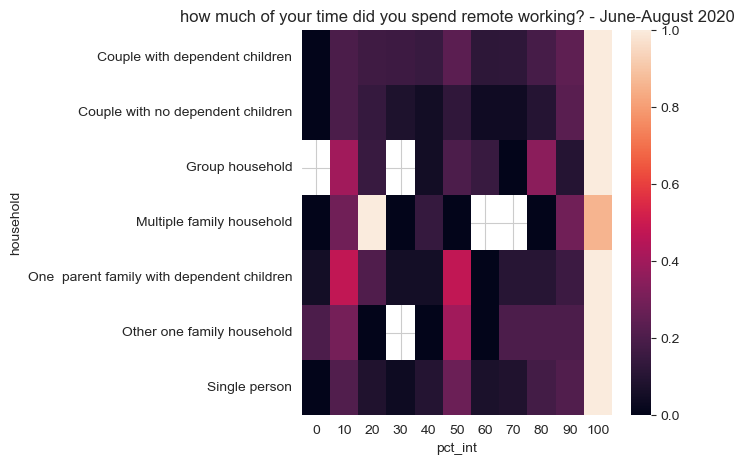

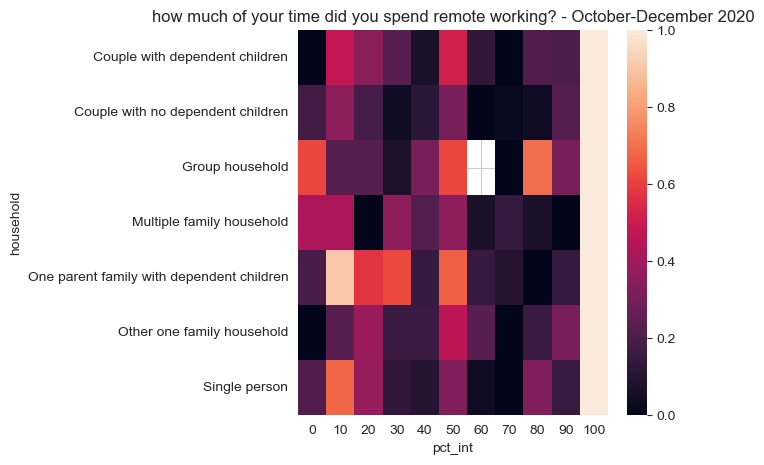

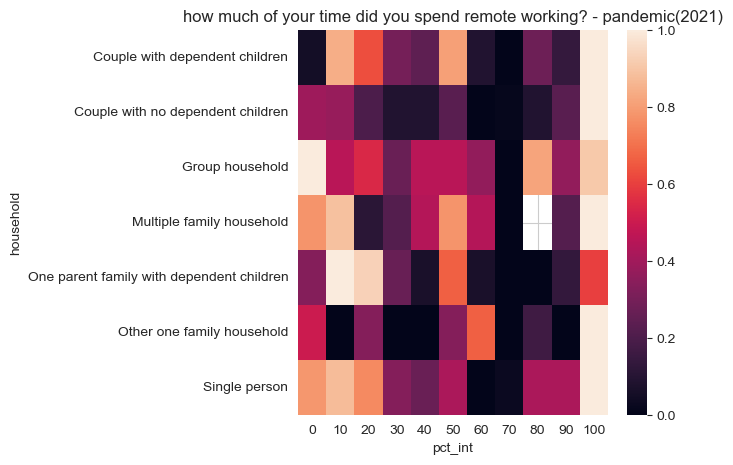

In [516]:
viz_exp11_bio(experience11_bio(8))

{'original IDs': ([9], [2]), 'question': 'length of current job', 'type': 'biology'}
{'original IDs': ([11, 19], [10, 8]), 'question': 'how much of your time did you spend remote working?', 'type': 'experience'}


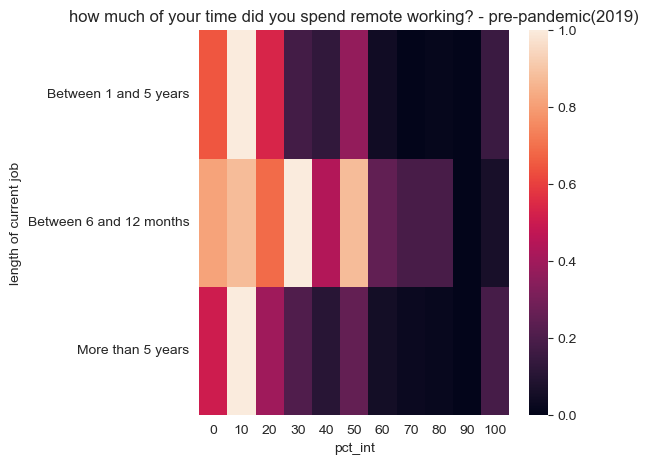

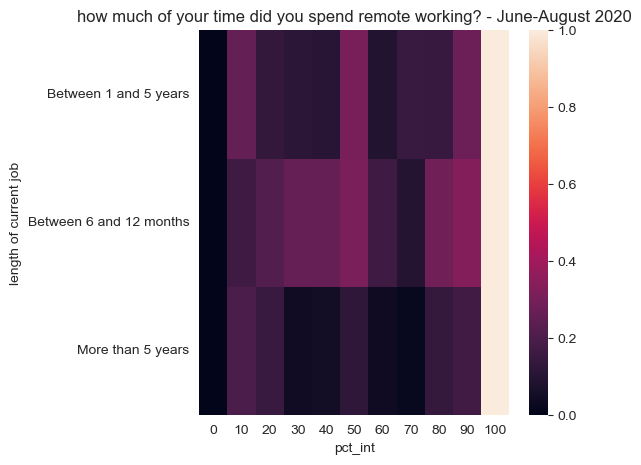

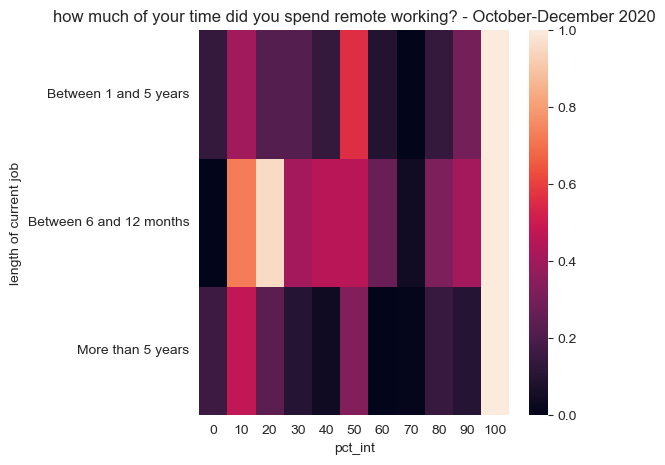

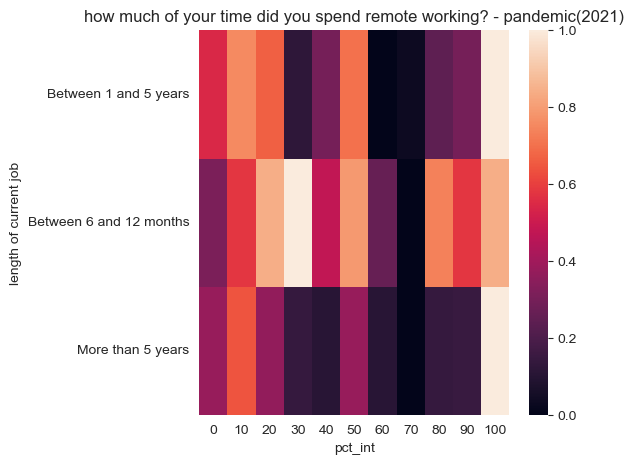

In [517]:
viz_exp11_bio(experience11_bio(9))

{'original IDs': ([10], [7]), 'question': 'Metro or Regional', 'type': 'biology'}
{'original IDs': ([11, 19], [10, 8]), 'question': 'how much of your time did you spend remote working?', 'type': 'experience'}


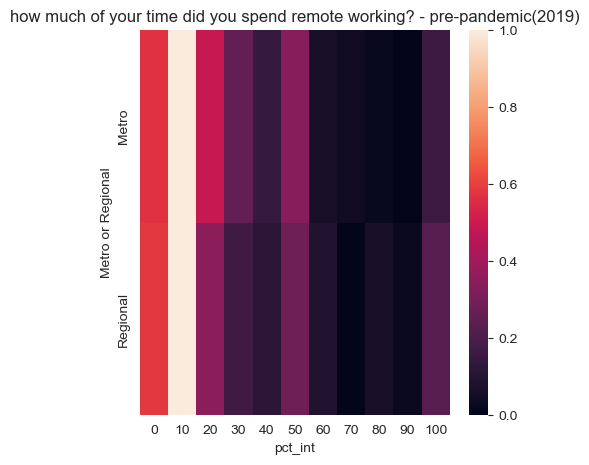

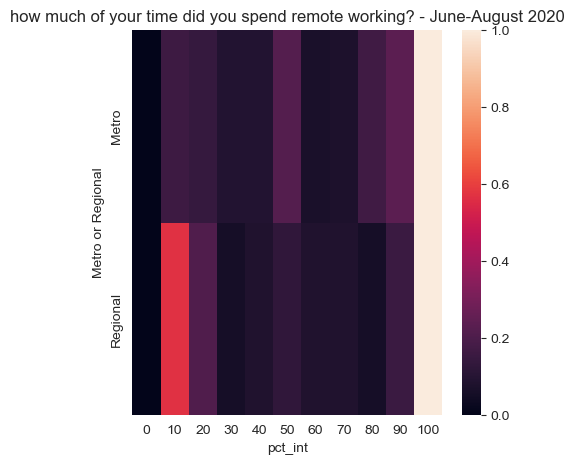

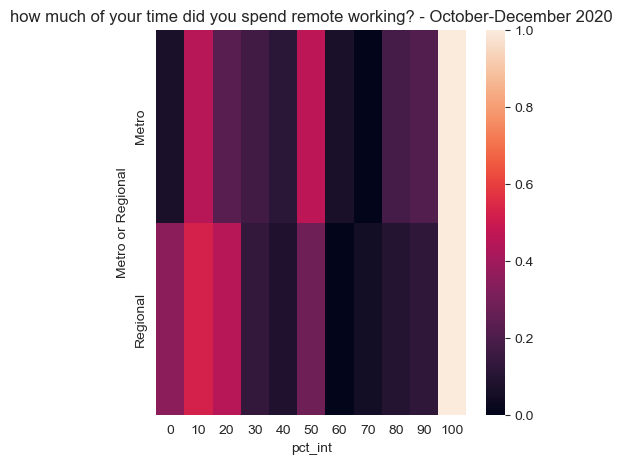

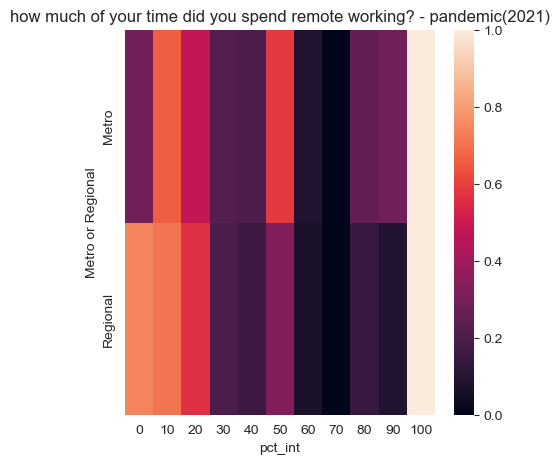

In [518]:
viz_exp11_bio(experience11_bio(10))

# 2. WFH Research